<a href="https://colab.research.google.com/github/Hansulich/park/blob/main/error_fixed_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

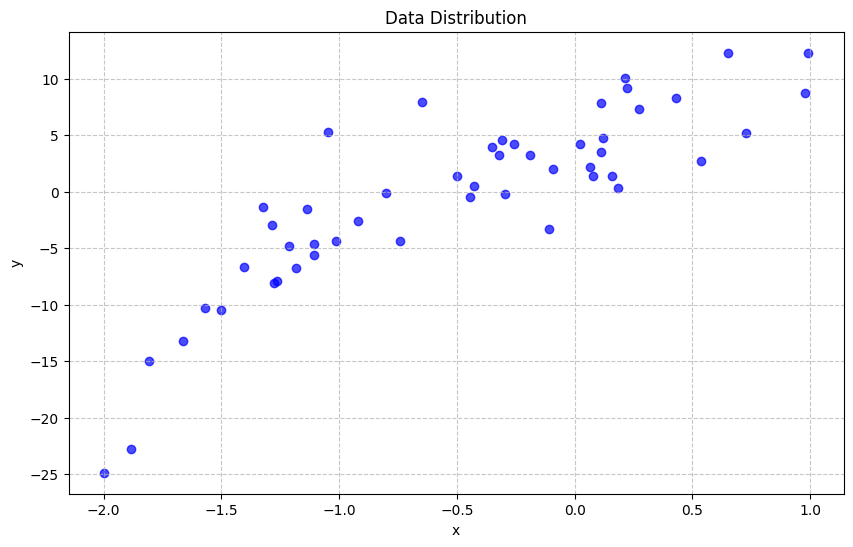

1-1. Linear Prediction Model using Least Squares Method
Parameters: y = 8.7359x + 3.9419


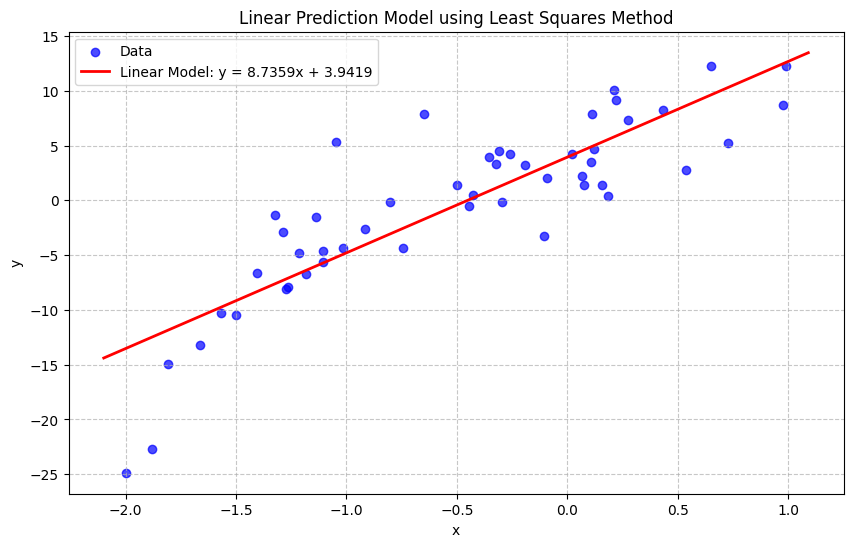

1-2. 2nd Order Polynomial Prediction Model using Least Squares Method
Parameters: y = -3.3168x^2 + 5.2792x + 5.0391
1-2. 10th Order Polynomial Prediction Model using Least Squares Method
Parameters: y = 2.7056 + 8.7466x^1 + 24.1108x^2 + -7.1774x^3 + -70.5949x^4 + -20.1207x^5 + 59.5355x^6 + 36.4913x^7 + -8.8862x^8 + -11.0685x^9 + -2.1584x^10


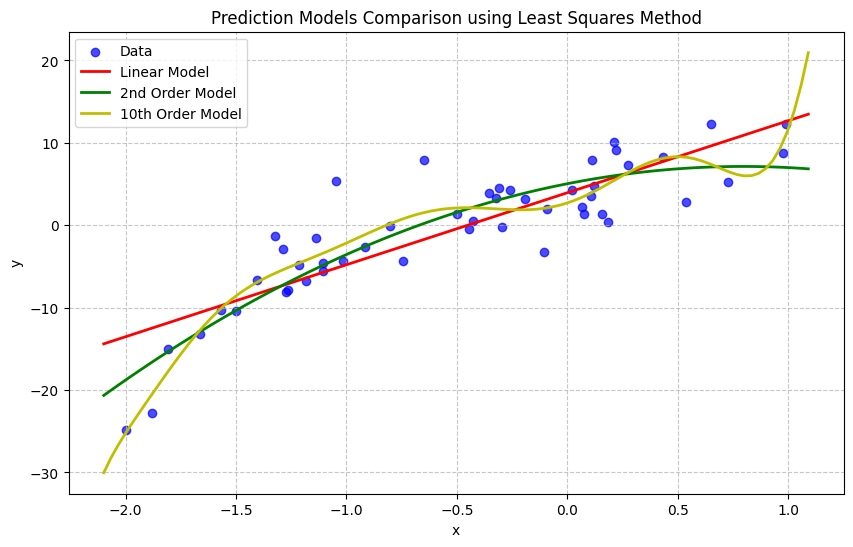

2-1. Linear Prediction Model using Gradient Descent
Parameters: y = 2.2360x + 0.0683


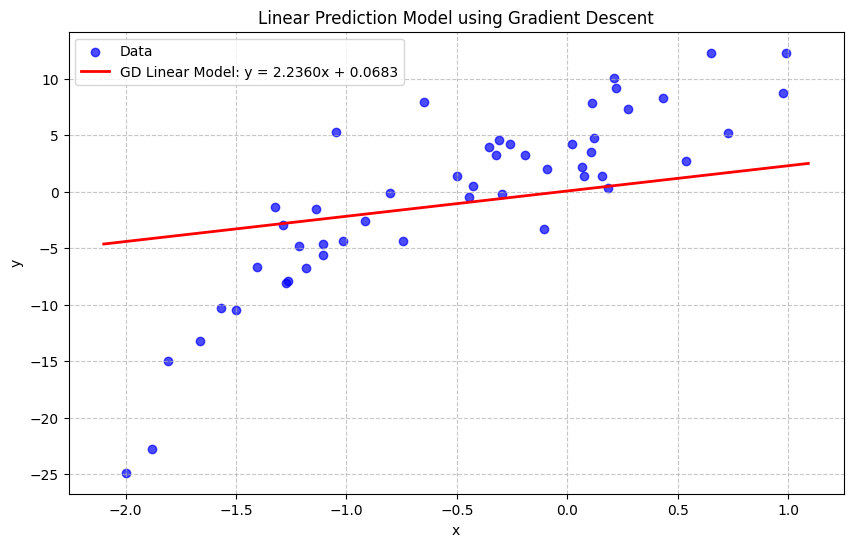

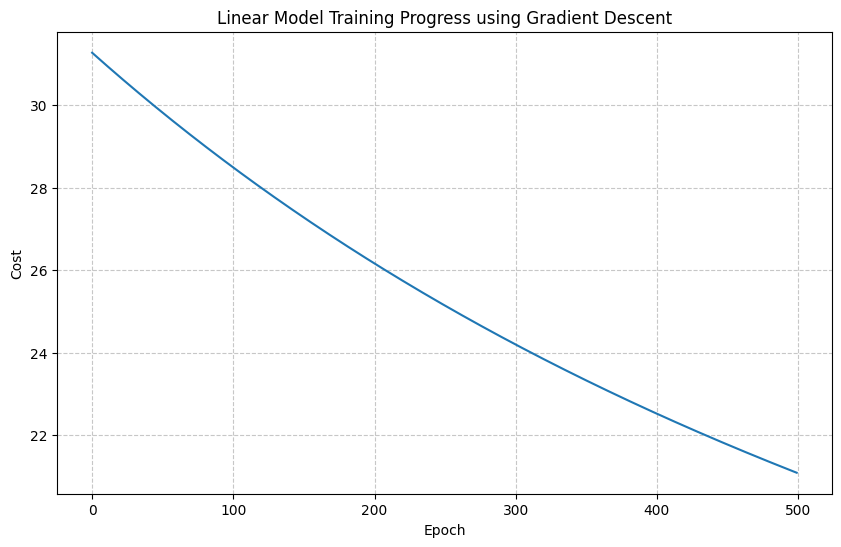

2-2. 2nd Order Polynomial Prediction Model using Gradient Descent
Parameters: y = -2.0292x^2 + 1.7164x + 0.4614
2-2. 4th Order Polynomial Prediction Model using Gradient Descent
Parameters: y = -1.0497x^4 + 0.9785x^3 + -0.0959x^2 + 0.6162x + 0.9673


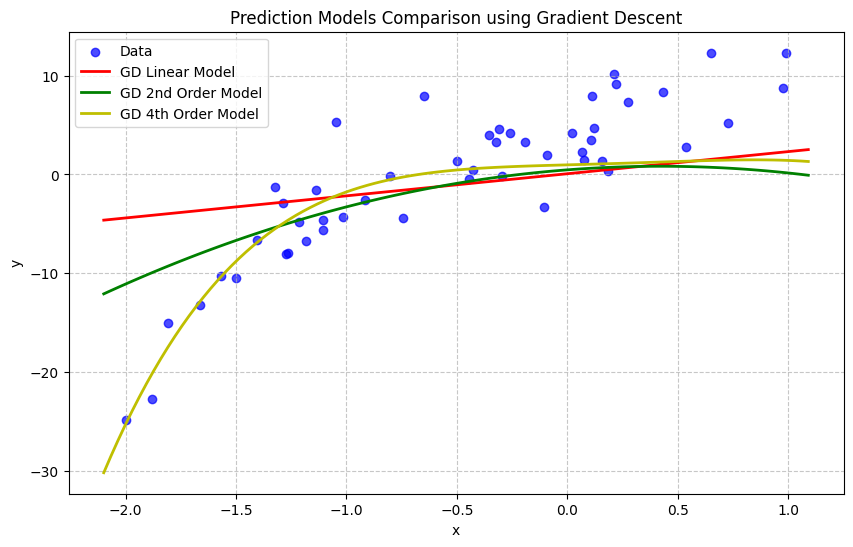

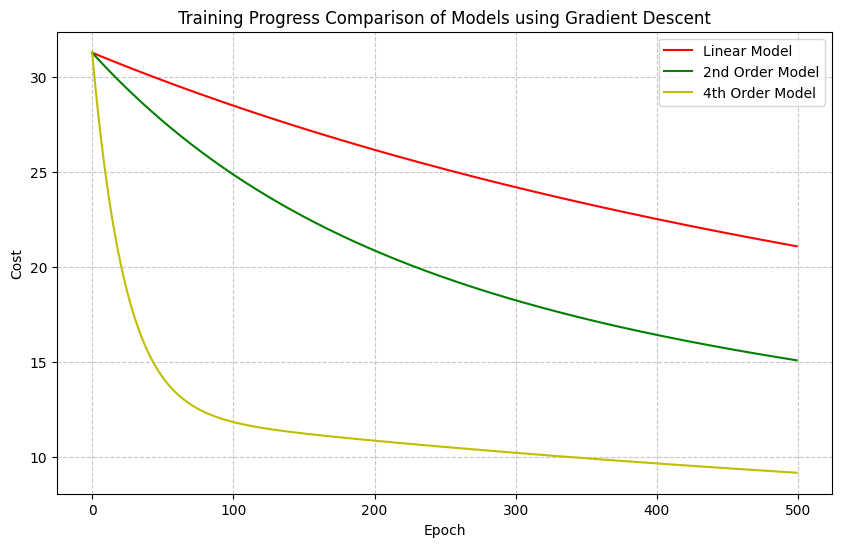


3. 두 방법의 파라미터 값 비교
======== 선형 모델 파라미터 비교 ========
최소제곱법: y = 8.7359x + 3.9419
경사하강법: y = 2.2360x + 0.0683

======== 2차 모델 파라미터 비교 ========
최소제곱법: y = -3.3168x^2 + 5.2792x + 5.0391
경사하강법: y = -2.0292x^2 + 1.7164x + 0.4614


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#data = pd.read_csv('https://github.com/Hansulich/park/blob/main/data0405.csv')
#data = pd.read_csv('/data0405.csv')


X = np.array([-0.09, -1.182, -1.107, -1.213, 0.066, -0.107, 0.223, -1.275, -1.325, -0.321, -0.189, 0.186, 0.114, 0.213, 0.979, 0.729, -0.918, -0.742, -0.446, 0.024, -0.801, -1.286, -0.5, -0.647, 0.992, -1.265, -0.257, 0.159, 0.077, -1.106, -1.882, 0.536, -1.999, -1.014, -1.048, 0.11, -1.569, -0.295, -1.137, 0.432, -0.426, -0.307, -0.352, 0.122, -1.404, -1.502, 0.275, 0.653, -1.662, -1.808])

y = np.array([2.012, -6.716, -5.609, -4.81, 2.22, -3.297, 9.155, -8.05, -1.314, 3.282, 3.233, 0.369, 7.89, 10.115, 8.726, 5.207, -2.628, -4.358, -0.489, 4.234, -0.139, -2.905, 1.361, 7.907, 12.304, -7.914, 4.223, 1.358, 1.421, -4.63, -22.734, 2.763, -24.869, -4.347, 5.312, 3.504, -10.251, -0.189, -1.531, 8.292, 0.472, 4.546, 3.954, 4.717, -6.621, -10.439, 7.296, 12.309, -13.213, -14.984])

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7)
plt.title('Data Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 1. 최소제곱법을 이용한 예측
# 1-1. 선형 예측 모델

X_b = np.c_[np.ones((len(X), 1)), X]

# 최소제곱법으로 파라미터 계산: theta = (X^T * X)^-1 * X^T * y
theta_linear = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Linear model parameters
linear_intercept = theta_linear[0]
linear_coef = theta_linear[1]

print("1-1. Linear Prediction Model using Least Squares Method")
print(f"Parameters: y = {linear_coef:.4f}x + {linear_intercept:.4f}")

# 선형 모델 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data')
x_range = np.linspace(min(X)-0.1, max(X)+0.1, 100)
plt.plot(x_range, linear_coef * x_range + linear_intercept, 'r-', linewidth=2,
         label=f'Linear Model: y = {linear_coef:.4f}x + {linear_intercept:.4f}')
plt.title('Linear Prediction Model using Least Squares Method')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 1-2. 비선형(2차 및 10차) 예측 모델
# 2차 다항식 특성 생성
X_poly2 = np.column_stack((np.ones(len(X)), X, X**2))
theta_poly2 = np.linalg.inv(X_poly2.T.dot(X_poly2)).dot(X_poly2.T).dot(y)

print("1-2. 2nd Order Polynomial Prediction Model using Least Squares Method")
print(f"Parameters: y = {theta_poly2[2]:.4f}x^2 + {theta_poly2[1]:.4f}x + {theta_poly2[0]:.4f}")

# 10차 다항식 특성 생성
X_poly10 = np.zeros((len(X), 11))
for i in range(11):
    X_poly10[:, i] = X**i

theta_poly10 = np.linalg.inv(X_poly10.T.dot(X_poly10)).dot(X_poly10.T).dot(y)

print("1-2. 10th Order Polynomial Prediction Model using Least Squares Method")
coef_str = f"Parameters: y = {theta_poly10[0]:.4f}"
for i in range(1, 11):
    coef_str += f" + {theta_poly10[i]:.4f}x^{i}"
print(coef_str)

# 2차 및 10차 모델 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data')

# 선형 모델 그리기
plt.plot(x_range, linear_coef * x_range + linear_intercept, 'r-', linewidth=2, label='Linear Model')

# 2차 모델 그리기
y_pred_poly2 = np.zeros_like(x_range)
for i in range(3):
    y_pred_poly2 += theta_poly2[i] * x_range**i
plt.plot(x_range, y_pred_poly2, 'g-', linewidth=2, label='2nd Order Model')

# 10차 모델 그리기
y_pred_poly10 = np.zeros_like(x_range)
for i in range(11):
    y_pred_poly10 += theta_poly10[i] * x_range**i
plt.plot(x_range, y_pred_poly10, 'y-', linewidth=2, label='10th Order Model')

plt.title('Prediction Models Comparison using Least Squares Method')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 2. 경사하강법을 이용한 예측
# 경사하강법 구현 함수
def gradient_descent(X, y, learning_rate=0.001, epochs=500):
    m = len(y)
    theta = np.zeros(X.shape[1])
    cost_history = []

    for i in range(epochs):
        prediction = X.dot(theta)
        error = prediction - y
        gradient = X.T.dot(error) / m
        theta = theta - learning_rate * gradient
        cost = np.sum(error ** 2) / (2 * m)
        cost_history.append(cost)

    return theta, cost_history

# 2-1. 선형 예측 모델
X_linear = np.column_stack((np.ones(len(X)), X))
theta_gd_linear, cost_history_linear = gradient_descent(X_linear, y, learning_rate=0.001, epochs=500)

print("2-1. Linear Prediction Model using Gradient Descent")
print(f"Parameters: y = {theta_gd_linear[1]:.4f}x + {theta_gd_linear[0]:.4f}")

# 경사하강법 선형 모델 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data')
plt.plot(x_range, theta_gd_linear[1] * x_range + theta_gd_linear[0], 'r-', linewidth=2,
         label=f'GD Linear Model: y = {theta_gd_linear[1]:.4f}x + {theta_gd_linear[0]:.4f}')
plt.title('Linear Prediction Model using Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 비용 함수 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(500), cost_history_linear)
plt.title('Linear Model Training Progress using Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 2-2. 비선형(2차 및 4차) 예측 모델
# 2차 다항식 특성 생성
X_poly2_features = np.column_stack((np.ones(len(X)), X, X**2))
theta_gd_poly2, cost_history_poly2 = gradient_descent(X_poly2_features, y, learning_rate=0.001, epochs=500)

print("2-2. 2nd Order Polynomial Prediction Model using Gradient Descent")
print(f"Parameters: y = {theta_gd_poly2[2]:.4f}x^2 + {theta_gd_poly2[1]:.4f}x + {theta_gd_poly2[0]:.4f}")

# 4차 다항식 특성 생성
X_poly4_features = np.column_stack((
    np.ones(len(X)),
    X,
    X**2,
    X**3,
    X**4
))
theta_gd_poly4, cost_history_poly4 = gradient_descent(X_poly4_features, y, learning_rate=0.001, epochs=500)

print("2-2. 4th Order Polynomial Prediction Model using Gradient Descent")
print(f"Parameters: y = {theta_gd_poly4[4]:.4f}x^4 + {theta_gd_poly4[3]:.4f}x^3 + {theta_gd_poly4[2]:.4f}x^2 + {theta_gd_poly4[1]:.4f}x + {theta_gd_poly4[0]:.4f}")

# 비선형 모델 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.7, label='Data')

# 경사하강법 선형 모델 그리기
plt.plot(x_range, theta_gd_linear[1] * x_range + theta_gd_linear[0], 'r-', linewidth=2, label='GD Linear Model')

# 경사하강법 2차 모델 그리기
y_pred_gd_poly2 = theta_gd_poly2[0] + theta_gd_poly2[1] * x_range + theta_gd_poly2[2] * x_range**2
plt.plot(x_range, y_pred_gd_poly2, 'g-', linewidth=2, label='GD 2nd Order Model')

# 경사하강법 4차 모델 그리기
y_pred_gd_poly4 = theta_gd_poly4[0] + theta_gd_poly4[1] * x_range + theta_gd_poly4[2] * x_range**2 + \
                 theta_gd_poly4[3] * x_range**3 + theta_gd_poly4[4] * x_range**4
plt.plot(x_range, y_pred_gd_poly4, 'y-', linewidth=2, label='GD 4th Order Model')

plt.title('Prediction Models Comparison using Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 비용 함수 비교 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(500), cost_history_linear, 'r-', label='Linear Model')
plt.plot(range(500), cost_history_poly2, 'g-', label='2nd Order Model')
plt.plot(range(500), cost_history_poly4, 'y-', label='4th Order Model')
plt.title('Training Progress Comparison of Models using Gradient Descent')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

# 3. 두 방법에 대해 파라미터 값 비교
print("\n3. 두 방법의 파라미터 값 비교")
print("======== 선형 모델 파라미터 비교 ========")
print(f"최소제곱법: y = {linear_coef:.4f}x + {linear_intercept:.4f}")
print(f"경사하강법: y = {theta_gd_linear[1]:.4f}x + {theta_gd_linear[0]:.4f}")

print("\n======== 2차 모델 파라미터 비교 ========")
print(f"최소제곱법: y = {theta_poly2[2]:.4f}x^2 + {theta_poly2[1]:.4f}x + {theta_poly2[0]:.4f}")
print(f"경사하강법: y = {theta_gd_poly2[2]:.4f}x^2 + {theta_gd_poly2[1]:.4f}x + {theta_gd_poly2[0]:.4f}")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')